In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import cPickle as pickle
import gzip

In [14]:
def local_maxima(d):
    '''
    returns bool array with the same shape as `d` with elemets at the position of local maxima in `d` are set to `True`
    this function simply checks if the neighbouring elements are smaller or equal and is __sensitive to noise__
    '''
    return r_[True, d[1:] >= d[:-1]] & r_[d[:-1] > d[1:], True]

def get_spike_idx(V, th=0):
    return nonzero(local_maxima(V) & (V>th))[0]

### PNs

In [6]:
PNData = pickle.load(gzip.open('Data/PNdata.pklz'))

dt = 1/20000. #20kHz sampling rate

In [17]:
spike_times = [[get_spike_idx(V)*dt for V in sweeps] for sweeps in PNData]

In [18]:
ISIs = [[diff(st) for st in sweeps] for sweeps in spike_times]

In [34]:
def plot_isis(neuron_number):
    for times,isis in zip(spike_times[neuron_number],ISIs[neuron_number]):
        plot(times[:-1],isis, '.--')

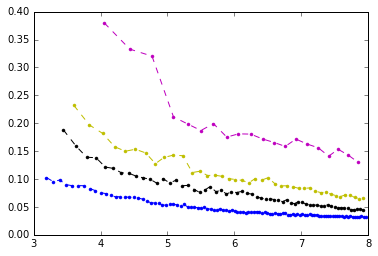

In [42]:
plot_isis(0)

### LNs

In [57]:
LNData = pickle.load(gzip.open('Data/LNdata.pklz'))
dt = 1/20000. #20kHz sampling rate

In [58]:
spike_times = [[get_spike_idx(V)*dt for V in sweeps] for sweeps in LNData]
ISIs = [[diff(st) for st in sweeps] for sweeps in spike_times]

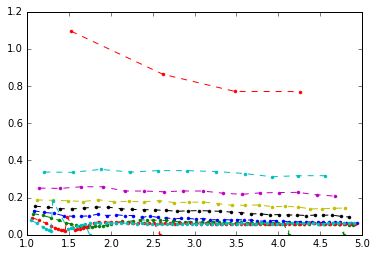

In [60]:
plot_isis(0)